# Admission

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

### 1. data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


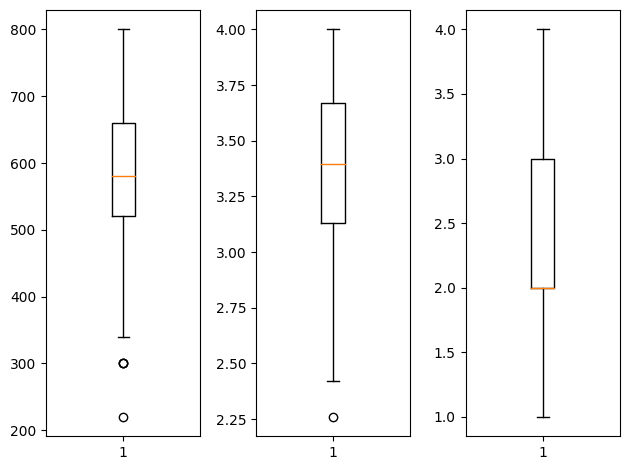

(382, 4)


In [ ]:
# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/admission.csv'
df = pd.read_csv(data)
display(df)  # 400 rows × 4 columns

# # 결측치 확인
# df.info()
# df.isnull().sum()
# # 결측치 존재하지 않음

# 이상치 확인
fig = plt.figure()
fig_gre = fig.add_subplot(1,3,1)
fig_gpa = fig.add_subplot(1,3,2)
fig_rank = fig.add_subplot(1,3,3)

fig_gre.boxplot(df["gre"])
fig_gpa.boxplot(df["gpa"])
fig_rank.boxplot(df["rank"])

plt.tight_layout()
plt.show()
# 수치상 이상치로 보이는 데이터가 존재
# 하지만 실제 데이터(이상치가 아님)
# 하지만 우리 학습을 위해 이상치로 판별된 데이터를 삭제하고 진행

zscore_threshold = 2.0

for col in df.columns:
    df = df.loc[np.abs(stats.zscore(df[col])) <= zscore_threshold]

print(df.shape)  # (382, 4), 18개의 데이터가 이상치로 제거

# 정규화 진행
x_data = df.drop('admit', axis=1, inplace=False).values
t_data = df["admit"].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

### 2. sklearn Model 구현

In [ ]:
# Model
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data, t_data)

# predict
predict_value = np.array([[600, 3.8, 1]])
result_proba = sklearn_model.predict_proba(predict_value)
print(result_proba)  # [[0.43740782 0.56259218]]

[[0.43740782 0.56259218]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3. Tensorflow Model 구현

In [ ]:
# Model
keras_model = Sequential()

# Layer
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                      activation="sigmoid"))

# compile
keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                    loss="binary_crossentropy")

# 학습
keras_model.fit(x_data_norm,
                t_data,
                epochs=500,
                verbose=0)

# predict
predict_value = np.array([[600, 3.8, 1]])
predict_value_norm = scaler.transform(predict_value)
result = keras_model.predict(predict_value_norm)

print(result)  # [[0.49605745]]

1/1 [==============================] - 0s 60ms/step
[[0.49605745]]


# 정규화를 했을 때 데이터 분포 확인
- Ozone Data Set

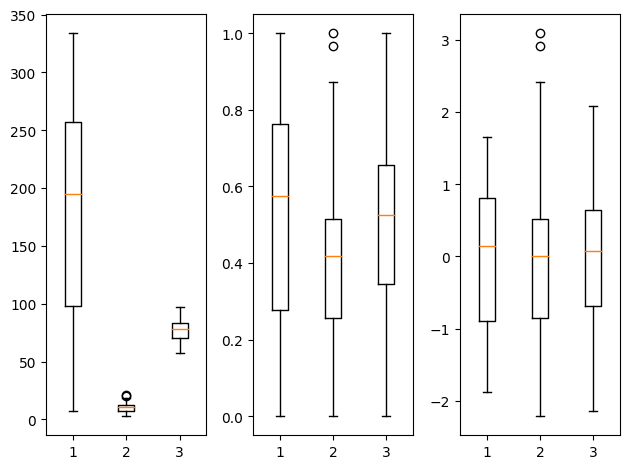

In [ ]:
# 정규화를 하면 데이터가 어떻게 변하나요?
# boxplot을 이용해서 살펴보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 데이터 로딩과 전처리!

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/LikeLion/ML/data/ozone.csv')

training_data = df[['Solar.R', 'Wind', 'Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')

# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# print(outlier)

# 이상치를 제거한 결과를 얻어야 해요!
# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]
# display(training_data)

x_data = training_data.drop('Ozone', axis=1, inplace=False).values
t_data = training_data['Ozone'].values.reshape(-1,1)

# 3. 정규화 진행(Normalization)
#    모든 feature에 대해 scale을 0과 1로 변경!
#    이렇게 해야 해요!
#    프로그램적으로 이 작업을 하려면 코드작업을 해야해서 좀 그래요!
#    sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

standard_scaler = StandardScaler()


scaled_x.fit(x_data)
scaled_t.fit(t_data)
standard_scaler.fit(x_data)

# 정규화된 Training Data Set 준비
x_data_norm = scaled_x.transform(x_data)
t_data_norm = scaled_t.transform(t_data)
x_data_stand_norm = standard_scaler.transform(x_data)


fig = plt.figure()
fig_ori = fig.add_subplot(1,3,1)
fig_minmax = fig.add_subplot(1,3,2)
fig_stand = fig.add_subplot(1,3,3)


fig_ori.boxplot(x_data)
fig_minmax.boxplot(x_data_norm)
fig_stand.boxplot(x_data_stand_norm)

plt.tight_layout()
plt.show()

# Imbalanced Data Problem

### 1. SMOTE 알고리즘

In [ ]:
# 유방암 예측 데이터의 불균형한 4개 feature에 대해 사용
from sklearn import datasets

data = datasets.load_breast_cancer()

df = pd.DataFrame(data.data,
                  columns=data.feature_names)

df = df[["mean radius", "mean texture", "mean area", "mean symmetry"]]

# target이 0이면 악성종양, 1이면 양성종양
df["target"] = data.target
display(df)

,mean radius,mean texture,mean area,mean symmetry,target
0,17.99,10.38,1001.0,0.2419,0
1,20.57,17.77,1326.0,0.1812,0
2,19.69,21.25,1203.0,0.2069,0
3,11.42,20.38,386.1,0.2597,0
4,20.29,14.34,1297.0,0.1809,0
...,...,...,...,...,...
564,21.56,22.39,1479.0,0.1726,0
565,20.13,28.25,1261.0,0.1752,0
566,16.60,28.08,858.1,0.1590,0
567,20.60,29.33,1265.0,0.2397,0


In [ ]:
# binary classification 문제
# label의 개수
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

x_data = df[["mean radius", "mean texture", "mean area", "mean symmetry"]]
t_data = df["target"]

new_x, new_t = SMOTE(random_state=42).fit_resample(x_data, t_data)

new_t.value_counts()

0    357
1    357
Name: target, dtype: int64

# Wisconsin Breast Cancer Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam


- SGD는 learning_rate에 민감해서 Adam optimizer 사용

### 1. data

(569, 30) (569,)
(array([0, 1]), array([212, 357]))


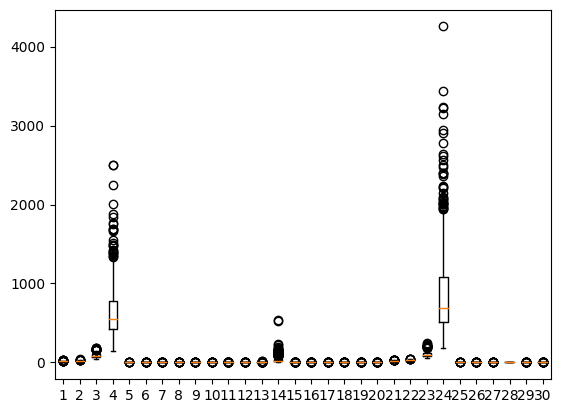

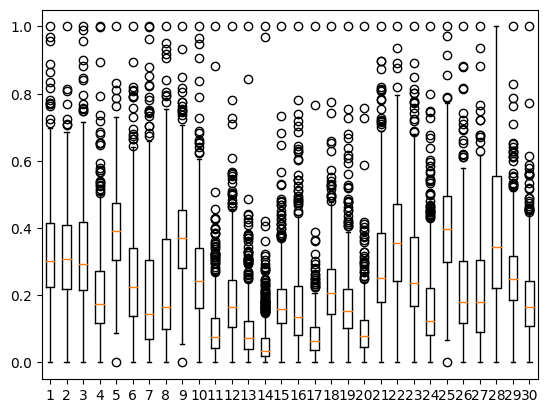

(array([0, 1]), array([42, 72]))

In [ ]:
# Raw Data Loading
# x_data(feature), t_data(0, 1), 데이터의 설명, ...
cancer = load_breast_cancer()

# x_data => cancer.data
# t_data => cancer.target

print(cancer.data.shape, cancer.target.shape)  # (569, 30) (569,)

print(np.unique(cancer.target, return_counts=True)) # (array([0, 1]), array([212, 357])), (0.37, 0.63)의 비율
# 0은 악성종양(나쁜 거), 1은 양성종양(괜찮은 거)
# 약간의 데이터 불균형이 존재(imbalanced data)

# 데이터셋 저장
x_data = cancer.data
t_data = cancer.target

# boxplot을 이용해서 이상치와 데이터 분포 간단하게 확인
plt.boxplot(x_data)
plt.show()

# 정규화가 필요하다는 것을 확인
# 원래 정규화는 당연히 이상치를 제거하고 진행하는 게 맞음
# 이 데이터의 경우 검증된 데이터이므로 실제적인 이상치는 존재하지 않는다고 가정하고 진행
# 수치적인 이상치만 존재
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# boxplot을 이용해서 정규화된 데이터 분포 간단하게 확인
plt.boxplot(x_data_norm)
plt.show()

# 학습용과 평가용 데이터셋 분리
# 데이터를 섞어서 분리해줌
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,  # 없어도 비율을 맞춰주긴 하지만 정확하게 비율 명시
                                                                                  test_size=0.2,  # defalut 값은 0.25
                                                                                  random_state=2)

# 분리된 데이터 확인
np.unique(t_data_test, return_counts=True)  # (array([0, 1]), array([42, 72])), (0.37, 0.63)의 비율,

### 2. sklearn model 구현

In [ ]:
# Model
sklearn_model = linear_model.LogisticRegression()

# 학습하기 전에 cross validation 수행
# train data를 가지고 수행
score = cross_val_score(sklearn_model, x_data_train_norm, t_data_train, cv=5)
print(score)  # [0.95604396 0.95604396 0.96703297 0.98901099 0.95604396]
print(f'sklearn의 평균 validation accuracy: {np.mean(score)}')  # 0.9648

# 학습 진행
sklearn_model.fit(x_data_train_norm, t_data_train)

# 모델 최종 평가
test_score = sklearn_model.score(x_data_test_norm, t_data_test)
print(f'모델의 최종 score: {test_score}')  # 0.9649

[0.95604396 0.95604396 0.96703297 0.98901099 0.95604396]
sklearn의 평균 validation accuracy: 0.9648351648351647
모델의 최종 score: 0.9649122807017544


### 3. Tensorflow 구현

In [ ]:
# Model
keras_model = Sequential()

# layer
keras_model.add(Flatten(input_shape=(30,)))
keras_model.add(Dense(units=1,
                      activation="sigmoid"))

# 학습 시 매 epoch마다 validation 수행하고
# validation의 평가 기준은 accuracy 사용
keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss="binary_crossentropy",
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=300,
                verbose=1,  # 매 epoch마다 validation 값을 확인하기 위해
                validation_split=0.2)  # 학습 데이터 중에서 20프로 validation set으로 사용

# Epoch 300/300
# 12/12 [==============================] - 0s 5ms/step - loss: 0.0897 - acc: 0.9780 - val_loss: 0.0586 - val_acc: 0.9780
# training data로 학습한 후
# training data로 평가 vs. validation data로 평가

# loss: training data로 학습한 후 training data를 이용해서 계산한 loss
# val_loss: training data로 학습한 후 validation data로 계산한 loss

In [ ]:
# 학습 끝
# Evaluation(평가)
result = keras_model.evaluate(x_data_test_norm,
                              t_data_test)
print(result)

4/4 [==============================] - 0s 7ms/step - loss: 0.0563 - acc: 0.9737
[0.05627043917775154, 0.9736841917037964]


# Titanic
- Titanic data를 이용한 Logistic Regression 구현
- kaggle에 있는 데이터 이용(train.csv)
- 데이터 전처리, 모델 학습, 자체 평가(validation) 진행
- 모델을 이용해 예측값 추출(test.csv)
- 예측된 결과를 kaggle에 upload해서 우리 모델의 성능을 검증

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

### 1. data

In [ ]:
# data load
data = r'/content/drive/MyDrive/LikeLion/ML/data/titanic/train.csv'
df = pd.read_csv(data)

# data preprocessing
train = df

# 불필요한 columns 삭제
train.drop(['PassengerId', 'Ticket', 'Name', 'Fare', 'Cabin'],
           axis=1,
           inplace=True)

train['Family'] = train['SibSp'] + train['Parch']
train.drop(["SibSp", "Parch"], axis=1, inplace=True)

# 성별 처리
gender_mapping = {'male': 0,
                  'female': 1}
train['Sex'] = train['Sex'].map(gender_mapping)

# Embarked 결측치 처리
train["Embarked"] = train["Embarked"].fillna('Q')

# Embarked 처리
Embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

train["Embarked"] = train["Embarked"].map(Embarked_mapping)

# Age 결측치 처리
train["Age"] = train["Age"].fillna(train["Age"].mean())

# 나이에 대해서는 Binning 처리
train.loc[train["Age"] < 8, 'Age'] = 0
train.loc[(train["Age"] >= 8) & (train["Age"] < 20), 'Age'] = 1
train.loc[(train["Age"] >= 20) & (train["Age"] < 65), 'Age'] = 2
train.loc[train["Age"] >= 65, 'Age'] = 3

x_data = train.drop('Survived', axis=1, inplace=False).values
t_data = train["Survived"].values.reshape(-1, 1)

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)

x_data_norm = scaler.transform(x_data)

# train 데이터와 test 데이터를 분리?
# 원래 내가 만든 모델의 최종 평가를 하기 위해서는 당연히 test 데이터 필요
# 우리는 kaggle에서 평가를 해주기 때문에 따로 test 데이터 분리 필요 없음

### 2. Keras Model

In [ ]:
# Model
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(5,)))
keras_model.add(Dense(units=1,
                      activation="sigmoid"))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss="binary_crossentropy",
                    metrics=["acc"])

keras_model.fit(x_data_norm,
                t_data,
                epochs=300,
                verbose=1,
                validation_split=0.2)

# Epoch 300/300
# 23/23 [==============================] - 0s 4ms/step - loss: 0.4538 - acc: 0.7992 - val_loss: 0.3907 - val_acc: 0.8212

In [ ]:
# 학습이 끝났으니 예측과 제출 데이터 형식으로 변경
test_data = r'/content/drive/MyDrive/LikeLion/ML/data/titanic/test.csv'
df_test = pd.read_csv(test_data)

passengerid = df_test["PassengerId"].values  # 제출용 PassengerId 저장
test = df_test  # shallow copy

# data preprocessing
test.drop(['PassengerId', 'Ticket', 'Name', 'Fare', 'Cabin'],
           axis=1,
           inplace=True)

test['Family'] = test['SibSp'] + test['Parch']
test.drop(["SibSp", "Parch"], axis=1, inplace=True)

# 성별 처리
gender_mapping = {'male': 0,
                  'female': 1}
test['Sex'] = test['Sex'].map(gender_mapping)

# Embarked 결측치 처리
test["Embarked"] = test["Embarked"].fillna('Q')

# Embarked 처리
Embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

test["Embarked"] = test["Embarked"].map(Embarked_mapping)

# Age 결측치 처리
test["Age"] = test["Age"].fillna(test["Age"].mean())

# 나이에 대해서는 Binning 처리
test.loc[test["Age"] < 8, 'Age'] = 0
test.loc[(test["Age"] >= 8) & (test["Age"] < 20), 'Age'] = 1
test.loc[(test["Age"] >= 20) & (test["Age"] < 65), 'Age'] = 2
test.loc[test["Age"] >= 65, 'Age'] = 3

x_data_test = test.values

# 정규화
x_data_norm = scaler.transform(x_data_test)  # 정규화는 train 데이터로 fit된 scaler 사용

# 예측
result = keras_model.predict(x_data_norm)

threshold = 0.5
predictions = (result > threshold).astype(int)  # boolean 값을 변경 int로 변경
# np.where(조건, 참, 거짓)
# np.where(result > threshold, 1, 0)

# submission DataFrame
df_submission = pd.DataFrame({'PassengerId': passengerid, 'Survived': np.squeeze(predictions)})  # np.squeeze: 배열 크기가 1인 차원 제거
display(df_submission)

# 제출용 파일
df_submission.to_csv(r'/content/drive/MyDrive/LikeLion/ML/data/titanic/submission.csv', index=False)

14/14 [==============================] - 0s 3ms/step


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 3. Submission
- 0.7751의 accuracy